# Hướng dẫn Tương tác: Qubit và Cổng Lượng tử

Chào mừng bạn đến với hướng dẫn thực hành về các khái niệm cơ bản trong điện toán lượng tử! Chúng ta sẽ khám phá:
1. **Qubit** - Những viên gạch xây dựng nên điện toán lượng tử
2. **Cổng Lượng tử** - Các phép toán để điều khiển qubit
3. **Chồng chập & Đo lường** - Các hiện tượng lượng tử
4. **Ví dụ Tương tác** - Xây dựng và trực quan hóa các mạch lượng tử

Hãy bắt đầu! 🚀

## Tóm tắt & Những Điểm Chính

🎯 **Những gì bạn đã học:**

1. **Qubit** có thể tồn tại trong trạng thái chồng chập của |0⟩ và |1⟩
2. **Cổng Pauli (X, Y, Z)** thực hiện các phép quay và đảo
3. **Cổng Hadamard (H)** tạo chồng chập đồng đều
4. **Cổng Pha (S, T)** thêm pha lượng tử mà không thay đổi xác suất
5. **Đo lường** làm sụp đổ chồng chập thành bit cổ điển
6. Các cổng có thể được **kết hợp** để tạo ra các phép toán lượng tử phức tạp

🚀 **Bước tiếp theo:**
- Khám phá hệ thống nhiều qubit và sự vướng víu (entanglement)
- Học về các thuật toán lượng tử (Deutsch-Jozsa, Grover, Shor)
- Nghiên cứu hiệu chỉnh lỗi lượng tử
- Xây dựng các mạch lượng tử phức tạp hơn

💡 **Thử thách:** Tạo một mạch tạo ra phân chia xác suất 70/30 giữa |0⟩ và |1⟩!

In [7]:
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator

print("✓ Import thư viện thành công!")
print(f"Phiên bản Qiskit: {__import__('qiskit').__version__}")

✓ Libraries imported successfully!
Qiskit version: 2.2.3


Qubit in |1⟩ state:
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

Probabilities: |0⟩=0.00, |1⟩=1.00


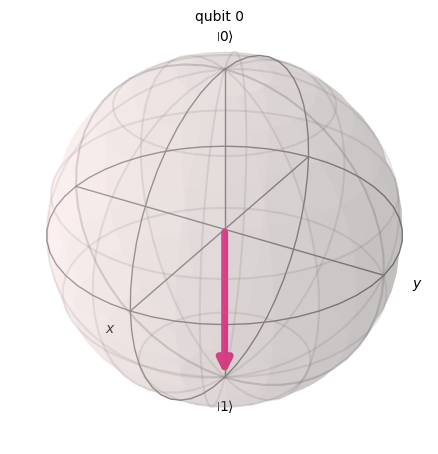

In [9]:
# Tạo một qubit ở trạng thái |1⟩
qubit_1 = Statevector.from_label('1')

print("Qubit ở trạng thái |1⟩:")
print(qubit_1)
print(f"\nXác suất: |0⟩={qubit_1.probabilities()[0]:.2f}, |1⟩={qubit_1.probabilities()[1]:.2f}")

# Trực quan hóa trên quả cầu Bloch
plot_bloch_multivector(qubit_1)

Qubit in |0⟩ state:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Probabilities: |0⟩=1.00, |1⟩=0.00


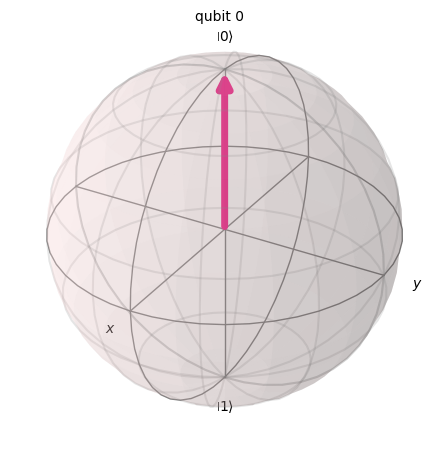

In [10]:
# Tạo một qubit ở trạng thái |0⟩
qubit_0 = Statevector.from_label('0')

print("Qubit ở trạng thái |0⟩:")
print(qubit_0)
print(f"\nXác suất: |0⟩={qubit_0.probabilities()[0]:.2f}, |1⟩={qubit_0.probabilities()[1]:.2f}")

# Trực quan hóa trên quả cầu Bloch
plot_bloch_multivector(qubit_0)

### Tạo Qubit Đầu tiên của bạn

Hãy tạo một qubit ở trạng thái |0⟩ và trực quan hóa nó trên quả cầu Bloch.

## Phần 1: Hiểu về Qubit

**Qubit** (bit lượng tử) là đơn vị cơ bản của thông tin lượng tử. Không giống như bit cổ điển chỉ có thể là 0 hoặc 1, qubit có thể tồn tại ở trạng thái **chồng chập** của cả hai trạng thái cùng lúc.

### Biểu diễn Toán học
Một trạng thái qubit được biểu diễn như sau: |ψ⟩ = α|0⟩ + β|1⟩

Trong đó:
- |0⟩ và |1⟩ là các trạng thái cơ sở
- α và β là các biên độ xác suất phức
- |α|² + |β|² = 1 (điều kiện chuẩn hóa)

In [11]:
# Hiển thị ma trận của các cổng phổ biến
gates = {
    'X': QuantumCircuit(1),
    'Y': QuantumCircuit(1),
    'Z': QuantumCircuit(1),
    'H': QuantumCircuit(1),
    'S': QuantumCircuit(1),
    'T': QuantumCircuit(1)
}

gates['X'].x(0)
gates['Y'].y(0)
gates['Z'].z(0)
gates['H'].h(0)
gates['S'].s(0)
gates['T'].t(0)

for name, circuit in gates.items():
    operator = Operator(circuit)
    print(f"\nMa trận Cổng {name}:")
    print(operator.data)
    print("-" * 40)


X Gate Matrix:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
----------------------------------------

Y Gate Matrix:
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
----------------------------------------

Z Gate Matrix:
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
----------------------------------------

H Gate Matrix:
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
----------------------------------------

S Gate Matrix:
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
----------------------------------------

T Gate Matrix:
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
----------------------------------------


## Phần 6: Ma trận Cổng

Hiểu biểu diễn toán học của các cổng giúp bạn nắm sâu hơn kiến thức.


Qubit |0⟩ after applying H twice:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Probabilities: |0⟩=1.00, |1⟩=0.00

Qubit |1⟩ after applying H twice:
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

Probabilities: |0⟩=0.00, |1⟩=1.00

Qubit |0⟩ after X → H → X → H:
Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))

Probabilities: |0⟩=0.00, |1⟩=1.00

Qubit |1⟩ after X → H → X → H:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Probabilities: |0⟩=1.00, |1⟩=0.00
Circuit to create |-⟩ (X -> H):


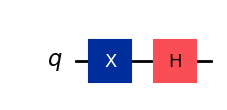


State |-⟩:
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))

Probabilities: |0⟩=0.50, |1⟩=0.50


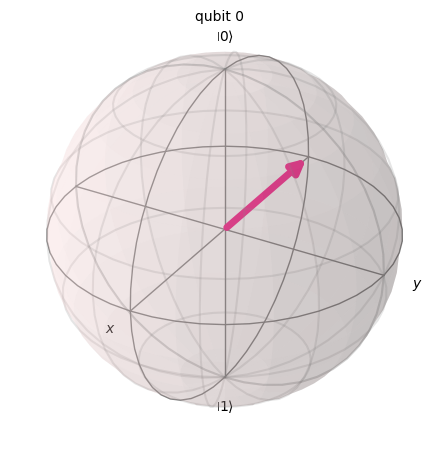

In [15]:
# Thử các kết hợp của riêng bạn ở đây!
# Bỏ comment và chỉnh sửa:

# explore_circuit([('h', 0), ('x', 0)])
# explore_circuit([('h', 0), ('z', 0), ('h', 0)])
# explore_circuit([('rx', 0, np.pi/3), ('ry', 0, np.pi/4)])

# Ý tưởng bài tập:
# 1. Điều gì xảy ra khi bạn áp dụng H hai lần?
# Giải pháp: Áp dụng H hai lần đưa qubit về trạng thái ban đầu.
qubit_0_after_HH = qubit_0.evolve(Operator(gates['H'])).evolve(Operator(gates['H']))
qubit_1_after_HH = qubit_1.evolve(Operator(gates['H'])).evolve(Operator(gates['H']))
print("\nQubit |0⟩ sau khi áp dụng H hai lần:")
print(qubit_0_after_HH)
print(f"\nXác suất: |0⟩={qubit_0_after_HH.probabilities()[0]:.2f}, |1⟩={qubit_0_after_HH.probabilities()[1]:.2f}")
print("\nQubit |1⟩ sau khi áp dụng H hai lần:")
print(qubit_1_after_HH)
print(f"\nXác suất: |0⟩={qubit_1_after_HH.probabilities()[0]:.2f}, |1⟩={qubit_1_after_HH.probabilities()[1]:.2f}")

# 2. Kết quả của X → H → X → H là gì?
circuit_XHXH = QuantumCircuit(1)
circuit_XHXH.x(0)
circuit_XHXH.h(0)
circuit_XHXH.x(0)
circuit_XHXH.h(0)
operator_XHXH = Operator(circuit_XHXH)
qubit_0_after_XHXH = qubit_0.evolve(operator_XHXH)
qubit_1_after_XHXH = qubit_1.evolve(operator_XHXH)
print("\nQubit |0⟩ sau X → H → X → H:")
print(qubit_0_after_XHXH)
print(f"\nXác suất: |0⟩={qubit_0_after_XHXH.probabilities()[0]:.2f}, |1⟩={qubit_0_after_XHXH.probabilities()[1]:.2f}")
print("\nQubit |1⟩ sau X → H → X → H:")
print(qubit_1_after_XHXH)
print(f"\nXác suất: |0⟩={qubit_1_after_XHXH.probabilities()[0]:.2f}, |1⟩={qubit_1_after_XHXH.probabilities()[1]:.2f}") 
# 3. Bạn có thể tạo trạng thái |-⟩ không? (Gợi ý: X rồi H)
qc_minus = QuantumCircuit(1)
qc_minus.x(0)
qc_minus.h(0)

print("Mạch để tạo |-⟩ (X -> H):")
display(qc_minus.draw('mpl'))

# Áp dụng lên |0⟩
state_minus = qubit_0.evolve(Operator(qc_minus))
print("\nTrạng thái |-⟩:")
print(state_minus)
print(f"\nXác suất: |0⟩={state_minus.probabilities()[0]:.2f}, |1⟩={state_minus.probabilities()[1]:.2f}")

# Trực quan hóa trên quả cầu Bloch
plot_bloch_multivector(state_minus)

In [ ]:
# Hàm tương tác để khám phá các kết hợp cổng
def explore_circuit(gates_list):
    """
    Áp dụng một chuỗi các cổng và trực quan hóa kết quả.
    
    gates_list: danh sách các tuple (tên_cổng, chỉ_số_qubit, *tham_số)
    Ví dụ: [('h', 0), ('s', 0), ('t', 0)]
    """
    qc = QuantumCircuit(1)
    
    for gate_info in gates_list:
        gate = gate_info[0].lower()
        qubit = gate_info[1]
        
        if gate == 'h':
            qc.h(qubit)
        elif gate == 'x':
            qc.x(qubit)
        elif gate == 'y':
            qc.y(qubit)
        elif gate == 'z':
            qc.z(qubit)
        elif gate == 's':
            qc.s(qubit)
        elif gate == 't':
            qc.t(qubit)
        elif gate == 'rx' and len(gate_info) > 2:
            qc.rx(gate_info[2], qubit)
        elif gate == 'ry' and len(gate_info) > 2:
            qc.ry(gate_info[2], qubit)
        elif gate == 'rz' and len(gate_info) > 2:
            qc.rz(gate_info[2], qubit)
    
    print("Mạch của bạn:")
    display(qc.draw('mpl'))
    
    # Tính toán và trực quan hóa trạng thái cuối cùng
    final_state = Statevector.from_label('0').evolve(qc)
    print("\nTrạng thái cuối cùng:")
    print(final_state)
    print(f"\nXác suất: |0⟩={final_state.probabilities()[0]:.3f}, |1⟩={final_state.probabilities()[1]:.3f}")
    
    display(plot_bloch_multivector(final_state))
    
    return qc, final_state

# Ví dụ: Thử các kết hợp khác nhau!
print("Ví dụ 1: X → H")
explore_circuit([('x', 0), ('h', 0)])

## Phần 5: Bài tập Tương tác - Tự xây dựng Mạch của bạn!

Bây giờ đến lượt bạn! Hãy thử tạo các mạch lượng tử khác nhau và xem điều gì xảy ra.

In [ ]:
from qiskit_aer import AerSimulator

# Tạo một mạch có đo lường
qc_measure = QuantumCircuit(1, 1)  # 1 qubit, 1 bit cổ điển
qc_measure.h(0)  # Cổng Hadamard
qc_measure.measure(0, 0)  # Đo qubit 0 vào bit cổ điển 0

print("Mạch có đo lường:")
display(qc_measure.draw('mpl'))

# Mô phỏng
simulator = AerSimulator()
compiled_circuit = transpile(qc_measure, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print("\nKết quả đo lường (1000 lần):")
print(counts)

# Vẽ biểu đồ
plot_histogram(counts)

## Phần 4: Đo lường và Mô phỏng

Hãy đo các mạch lượng tử của chúng ta và xem bản chất xác suất của cơ học lượng tử!

In [ ]:
# Mạch ban đầu của bạn: H + S + T
qc = QuantumCircuit(1)
qc.h(0)  # Cổng Hadamard - Tạo chồng chập
qc.s(0)  # Cổng pha - Thêm pha π/2
qc.t(0)  # Cổng T - Thêm pha π/4

print("Mạch Kết hợp: H → S → T")
display(qc.draw('mpl'))

# Tính toán trạng thái cuối cùng
final_state = Statevector.from_label('0').evolve(qc)
print("\nTrạng thái cuối cùng:")
print(final_state)
print(f"\nXác suất: |0⟩={final_state.probabilities()[0]:.2f}, |1⟩={final_state.probabilities()[1]:.2f}")

# Trực quan hóa
plot_bloch_multivector(final_state)

## Phần 3: Kết hợp Các Cổng

Bây giờ hãy kết hợp nhiều cổng lại để xem chúng làm việc cùng nhau như thế nào!

In [ ]:
# Cổng RX, RY, RZ - Quay quanh trục X, Y, Z
angles = [0, np.pi/4, np.pi/2, np.pi]
fig, axes = plt.subplots(1, len(angles), figsize=(16, 4))

for i, angle in enumerate(angles):
    qc_rx = QuantumCircuit(1)
    qc_rx.rx(angle, 0)
    
    state = Statevector.from_label('0').evolve(qc_rx)
    
    ax = axes[i]
    plot_bloch_multivector(state, title=f'RX({angle:.2f})', ax_real=ax)
    
plt.tight_layout()
plt.show()

print("Cổng RX quay qubit quanh trục X")
print("Thử các góc khác nhau: 0, π/4, π/2, π")

### 2.4 Cổng Quay

Cổng quay cho phép kiểm soát chính xác các trạng thái qubit bằng cách quay quanh các trục khác nhau.

In [ ]:
# Cổng T - Thêm pha π/4
qc_t = QuantumCircuit(1)
qc_t.h(0)  # Tạo chồng chập
qc_t.t(0)  # Áp dụng cổng T

print("Mạch Cổng T (với H trước):")
display(qc_t.draw('mpl'))

state_after_t = Statevector.from_label('0').evolve(qc_t)
print("\nTrạng thái sau khi áp dụng H rồi cổng T:")
print(state_after_t)

plot_bloch_multivector(state_after_t)

In [ ]:
# Cổng S (cổng Pha) - Thêm pha π/2
qc_s = QuantumCircuit(1)
qc_s.h(0)  # Tạo chồng chập
qc_s.s(0)  # Áp dụng cổng S

print("Mạch Cổng S (với H trước):")
display(qc_s.draw('mpl'))

state_after_s = Statevector.from_label('0').evolve(qc_s)
print("\nTrạng thái sau khi áp dụng H rồi cổng S:")
print(state_after_s)

plot_bloch_multivector(state_after_s)

### 2.3 Cổng Pha (S và T)

Cổng pha thêm một pha vào thành phần |1⟩ mà không làm thay đổi xác suất.

In [ ]:
# Cổng Hadamard
qc_h = QuantumCircuit(1)
qc_h.h(0)

print("Mạch Cổng Hadamard:")
display(qc_h.draw('mpl'))

# Áp dụng lên |0⟩
state_after_h = Statevector.from_label('0').evolve(qc_h)
print("\nTrạng thái sau khi áp dụng cổng H lên |0⟩:")
print(state_after_h)
print(f"Đây là trạng thái |+⟩: (|0⟩ + |1⟩)/√2")
print(f"\nXác suất: |0⟩={state_after_h.probabilities()[0]:.2f}, |1⟩={state_after_h.probabilities()[1]:.2f}")

# Trực quan hóa
plot_bloch_multivector(state_after_h)

### 2.2 Cổng Hadamard (H) - Tạo Chồng chập

Cổng Hadamard là một trong những cổng quan trọng nhất trong điện toán lượng tử. Nó tạo ra trạng thái chồng chập đồng đều của |0⟩ và |1⟩.

In [ ]:
# Cổng Z - Đảo pha
qc_z = QuantumCircuit(1)
qc_z.z(0)

print("Mạch Cổng Z:")
display(qc_z.draw('mpl'))

# Cổng Z không ảnh hưởng đến |0⟩, nhưng thêm pha vào |1⟩
# Hãy áp dụng nó lên trạng thái chồng chập
qc_z_demo = QuantumCircuit(1)
qc_z_demo.h(0)  # Tạo chồng chập trước
qc_z_demo.z(0)

state_after_z = Statevector.from_label('0').evolve(qc_z_demo)
print("\nTrạng thái sau khi áp dụng H rồi Z lên |0⟩:")
print(state_after_z)

plot_bloch_multivector(state_after_z)

In [ ]:
# Cổng Y - Quay quanh trục Y
qc_y = QuantumCircuit(1)
qc_y.y(0)

print("Mạch Cổng Y:")
display(qc_y.draw('mpl'))

state_after_y = Statevector.from_label('0').evolve(qc_y)
print("\nTrạng thái sau khi áp dụng cổng Y lên |0⟩:")
print(state_after_y)

plot_bloch_multivector(state_after_y)

In [ ]:
# Cổng X (cổng NOT) - Đảo |0⟩ ↔ |1⟩
qc_x = QuantumCircuit(1)
qc_x.x(0)

print("Mạch Cổng X:")
display(qc_x.draw('mpl'))

# Áp dụng lên |0⟩
state_after_x = Statevector.from_label('0').evolve(qc_x)
print("\nTrạng thái sau khi áp dụng cổng X lên |0⟩:")
print(state_after_x)

# Trực quan hóa
plot_bloch_multivector(state_after_x)

## Phần 2: Cổng Qubit Đơn

Cổng lượng tử là các phép toán biến đổi trạng thái qubit. Hãy cùng khám phá các cổng qubit đơn quan trọng nhất!

### 2.1 Cổng Pauli (X, Y, Z)